In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

import warnings
warnings.filterwarnings("ignore")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [3]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# Load weights trained on MS-COCO
model.load_weights('mask_rcnn_coco.h5', by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [5]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']
desired_classes = [*range(0,11), 12, 13, *range(16,25)]

(720, 1280, 3)


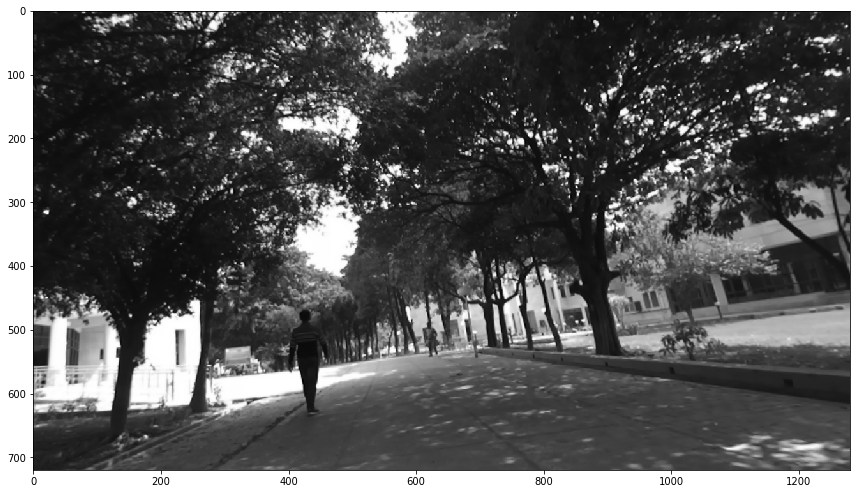

In [6]:
# Load a random image from the images folder
image = skimage.io.imread('coco/images/1.png')
image = np.stack((image,image,image),axis=2)
print(image.shape)

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (720, 1280, 3)        min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

2 2 2


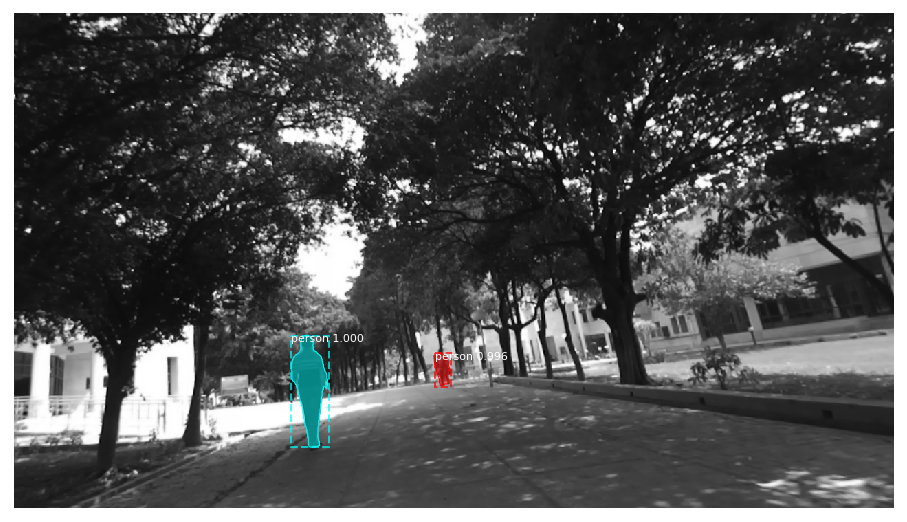

In [7]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
desired_class_indices = [i for i,j in enumerate(r['class_ids']) if j in desired_classes]
visualize.display_instances(image, r['rois'][desired_class_indices], r['masks'][:,:,desired_class_indices], r['class_ids'][desired_class_indices], class_names, r['scores'][desired_class_indices])

(720, 1280, 3)


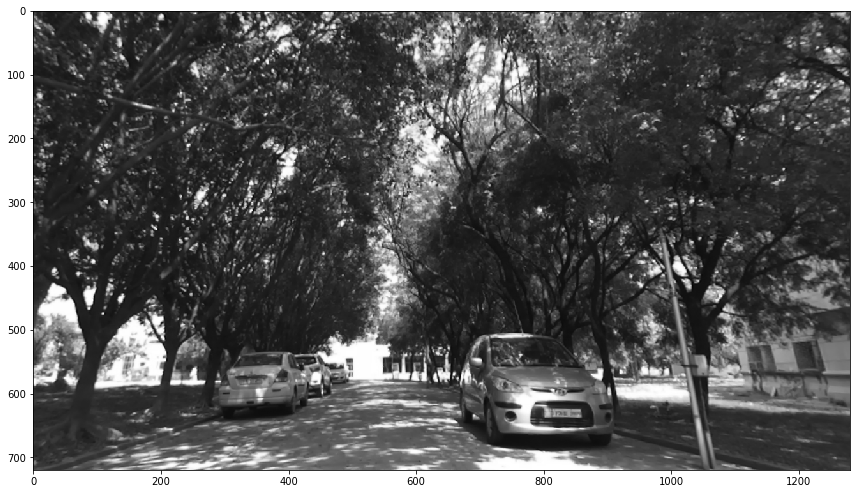

In [15]:
# Load a random image from the images folder
image = skimage.io.imread('coco/images/2.png')
image = np.stack((image,image,image),axis=2)
print(image.shape)

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (720, 1280, 3)        min:    2.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
8.13362979888916
5 5 5


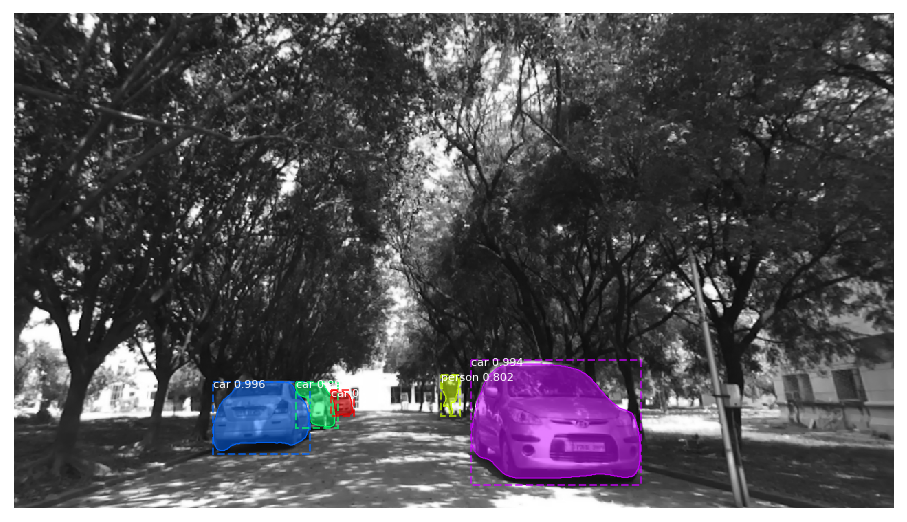

In [17]:
# Run detection
import time
t = time.time()
results = model.detect([image], verbose=1)
print(time.time()-t)

# Visualize results
r = results[0]
desired_class_indices = [i for i,j in enumerate(r['class_ids']) if j in desired_classes]
visualize.display_instances(image, r['rois'][desired_class_indices], r['masks'][:,:,desired_class_indices], r['class_ids'][desired_class_indices], class_names, r['scores'][desired_class_indices])

In [10]:
# print(r['rois'].shape, r['masks'].shape)
# print(r['rois'][desired_class_indices].shape, r['masks'][:,:,desired_class_indices].shape)

# desired_class_indices = [i for i,j in enumerate(r['class_ids']) if j in desired_classes]
# print(r['rois'])
# print(r['rois'][desired_class_indices])
# print(r['rois'][desired_class_indices], r['masks'][desired_class_indices], r['class_ids'][desired_class_indices], class_names, r['scores'][desired_class_indices])

In [11]:
# [desired_class_indices]

(871, 1300, 3)


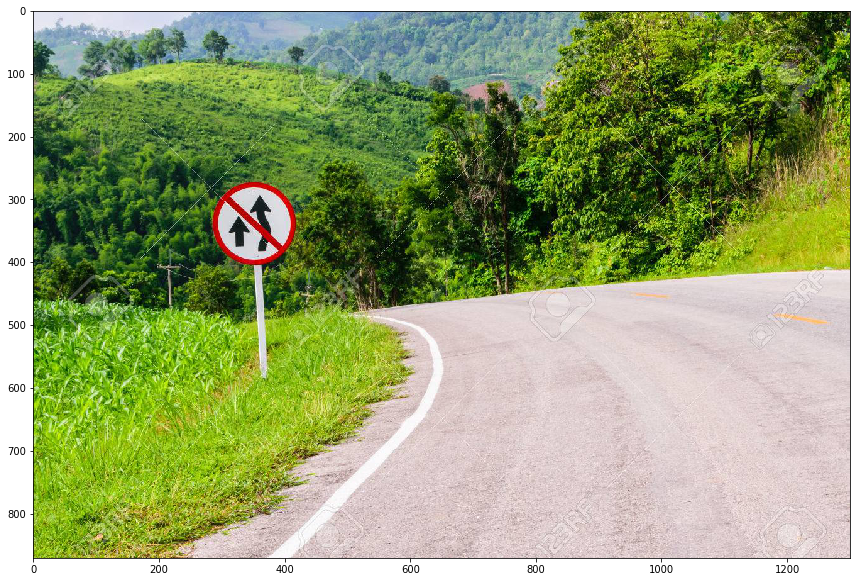

In [19]:
# Load a random image from the images folder
image = skimage.io.imread('coco/images/3.jpg')
print(image.shape)

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (871, 1300, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1300.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1 1 1


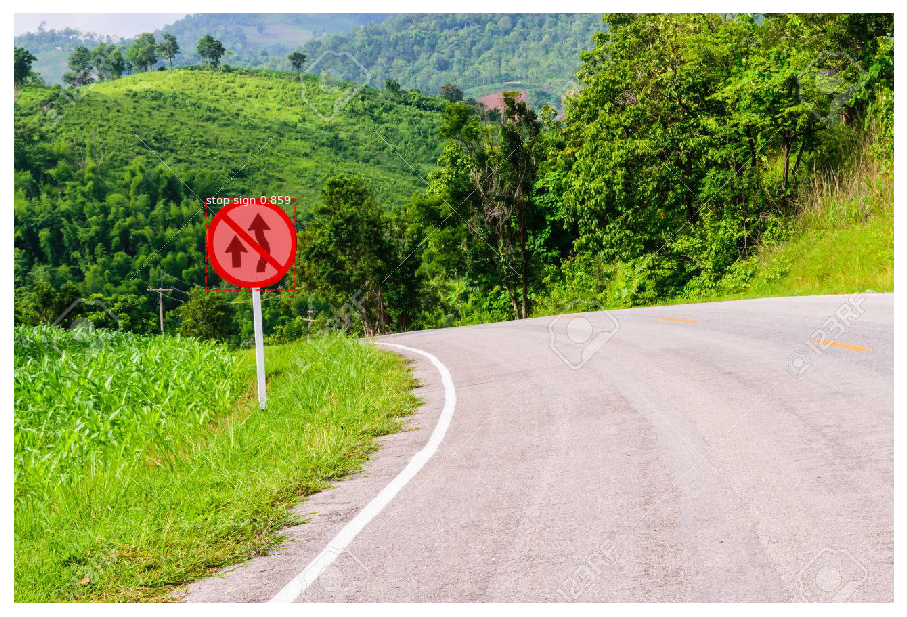

In [13]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
desired_class_indices = [i for i,j in enumerate(r['class_ids']) if j in desired_classes]
visualize.display_instances(image, r['rois'][desired_class_indices], r['masks'][:,:,desired_class_indices], r['class_ids'][desired_class_indices], class_names, r['scores'][desired_class_indices])

(376, 672, 3)


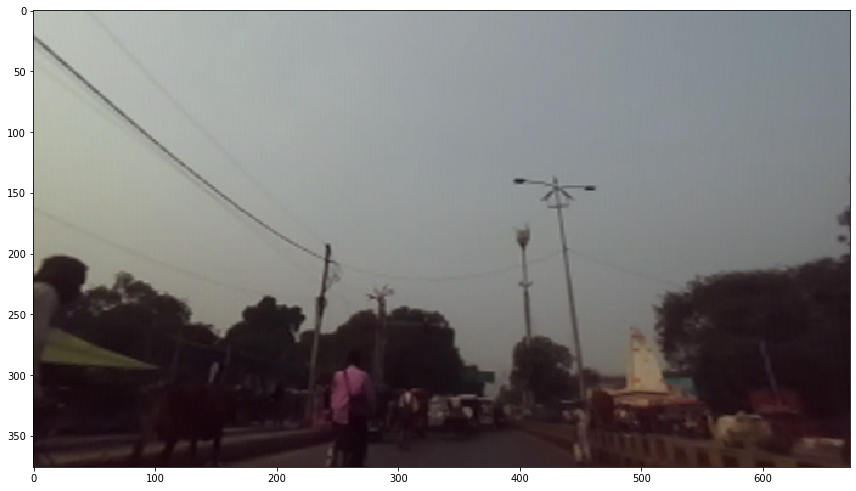

In [11]:
# Load a random image from the images folder
image = skimage.io.imread('coco/images/4.png')
image = image[:,:,:-1]
# image = np.stack((image,image,image),axis=2)
print(image.shape)

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (376, 672, 3)         min:    0.00000  max:  196.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   86.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

7 7 7


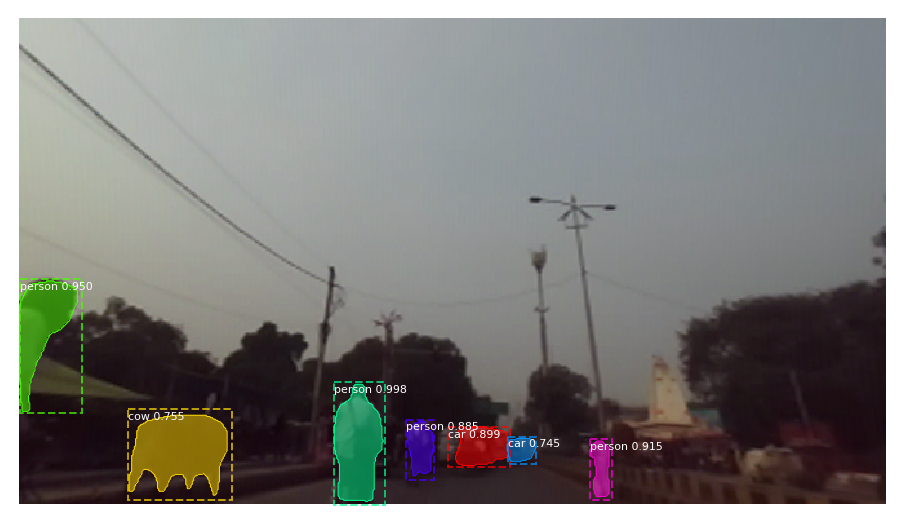

In [12]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
desired_class_indices = [i for i,j in enumerate(r['class_ids']) if j in desired_classes]
visualize.display_instances(image, r['rois'][desired_class_indices], r['masks'][:,:,desired_class_indices], r['class_ids'][desired_class_indices], class_names, r['scores'][desired_class_indices])

(376, 672, 3)


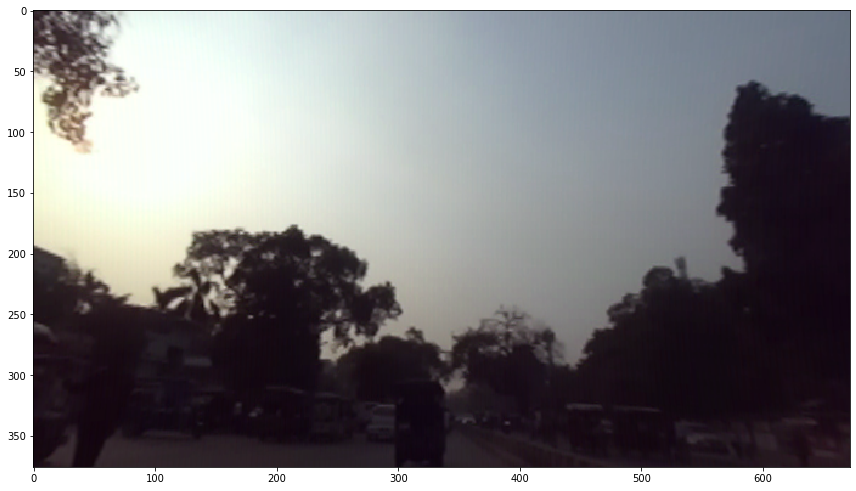

In [13]:
# Load a random image from the images folder
image = skimage.io.imread('coco/images/5.png')
image = image[:,:,:-1]
# image = np.stack((image,image,image),axis=2)
print(image.shape)

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (376, 672, 3)         min:    2.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4 4 4


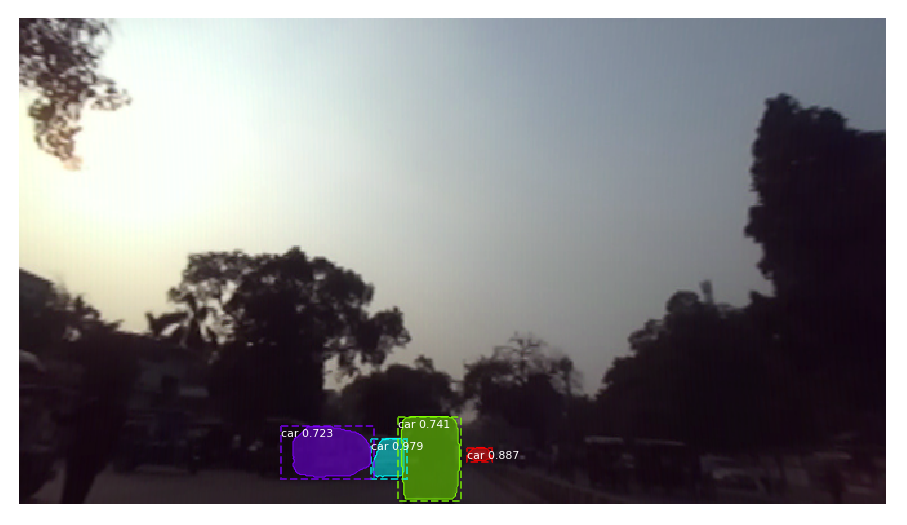

In [14]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
desired_class_indices = [i for i,j in enumerate(r['class_ids']) if j in desired_classes]
visualize.display_instances(image, r['rois'][desired_class_indices], r['masks'][:,:,desired_class_indices], r['class_ids'][desired_class_indices], class_names, r['scores'][desired_class_indices])

(376, 672, 3)


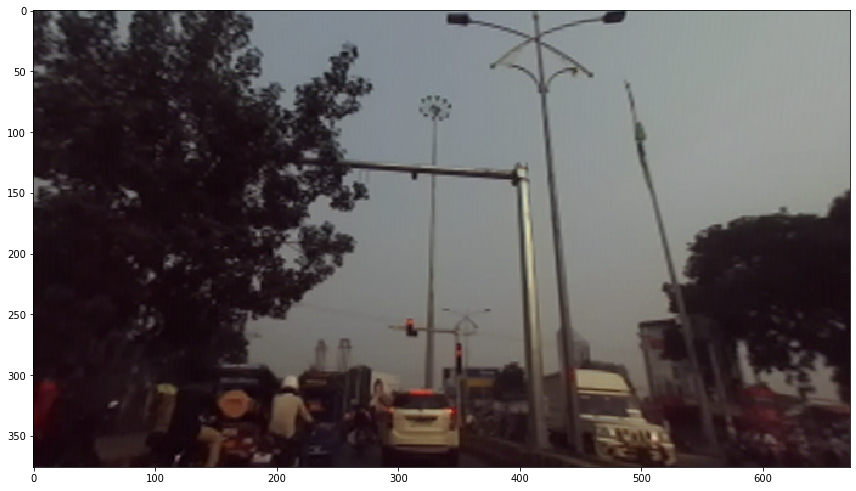

In [15]:
# Load a random image from the images folder
image = skimage.io.imread('coco/images/6.png')
image = image[:,:,:-1]
# image = np.stack((image,image,image),axis=2)
print(image.shape)

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (376, 672, 3)         min:    0.00000  max:  219.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  100.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4 4 4


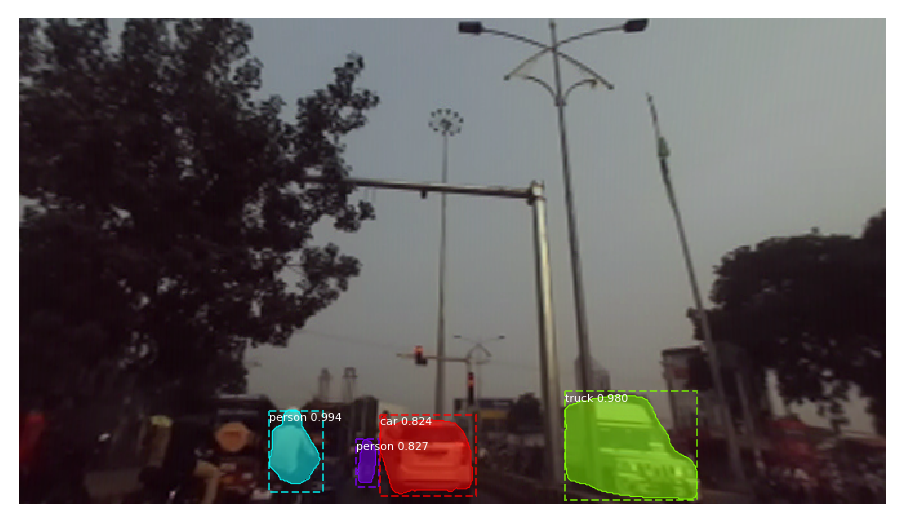

In [16]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
desired_class_indices = [i for i,j in enumerate(r['class_ids']) if j in desired_classes]
visualize.display_instances(image, r['rois'][desired_class_indices], r['masks'][:,:,desired_class_indices], r['class_ids'][desired_class_indices], class_names, r['scores'][desired_class_indices])

(376, 672, 3)
Processing 1 images
image                    shape: (376, 672, 3)         min:    0.00000  max:  207.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   82.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
7 7 7


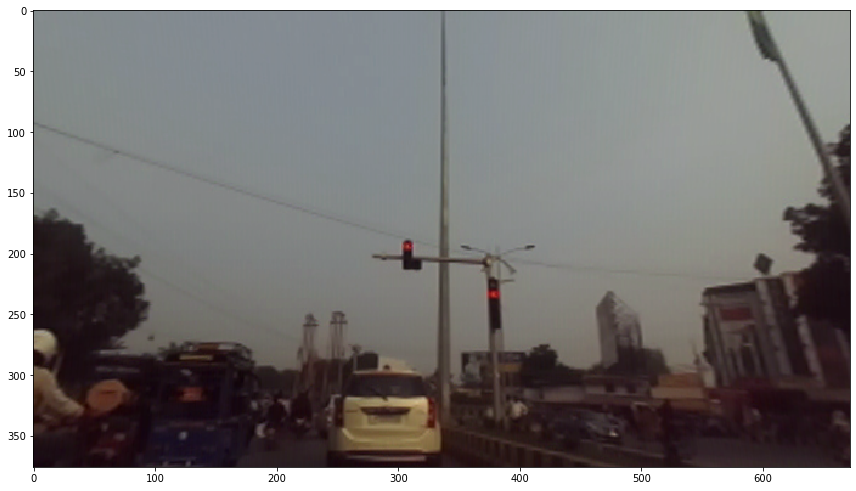

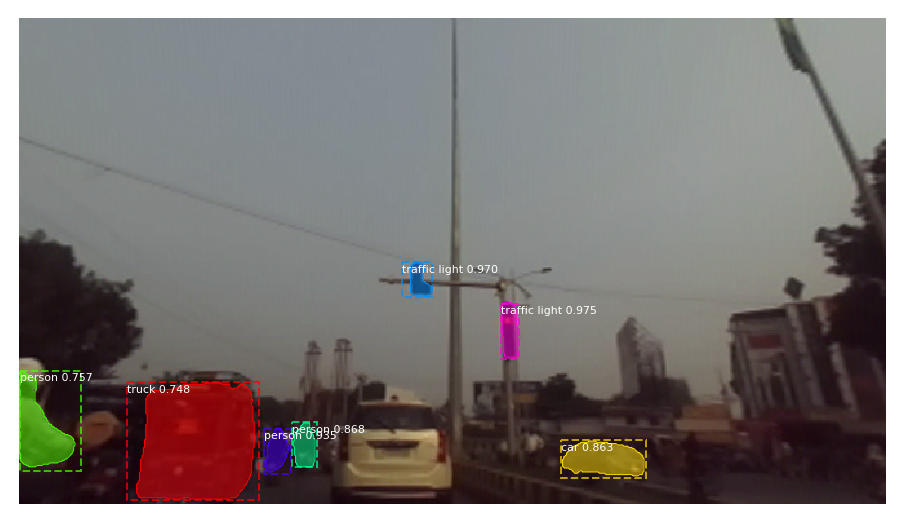

In [17]:
# Load a random image from the images folder
image = skimage.io.imread('coco/images/7.png')
image = image[:,:,:-1]
# image = np.stack((image,image,image),axis=2)
print(image.shape)

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
desired_class_indices = [i for i,j in enumerate(r['class_ids']) if j in desired_classes]
visualize.display_instances(image, r['rois'][desired_class_indices], r['masks'][:,:,desired_class_indices], r['class_ids'][desired_class_indices], class_names, r['scores'][desired_class_indices])

In [19]:
a = np.arange(24).reshape(3,8)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [29]:
len(a.shape)

2

In [26]:
a.shape

(3, 8)

In [32]:
from PIL import Image

In [44]:
im_rgb = Image.open("/home/subtleseeker/Desktop/SLAM/04/Mask_RCNN/samples/auto/dataset/images/1.png")
im2 =  Image.open("/home/subtleseeker/Desktop/SLAM/04/Mask_RCNN/samples/auto/dataset/masks/04399.png")

In [51]:
im2 = Image.fromarray(np.array(im2))
type(im2)

PIL.Image.Image

In [52]:
im_rgba = im_rgb.copy()
im_rgba.putalpha(im2)
im_rgba.save('/home/subtleseeker/Desktop/pillow_putalpha_solid.png')

ValueError: illegal image mode

In [37]:
type(im_rgba)

PIL.Image.Image

In [38]:
np.shape(im_rgba)

(720, 1280, 2)

In [39]:
np.shape(im_rgb)

(720, 1280)